In [1]:
from sklearn.datasets import fetch_kddcup99
kdd99_data = fetch_kddcup99(subset = 'http')
import numpy as np
X = kdd99_data['data']
y = kdd99_data['target']

In [2]:

for i in range(X.shape[0]):
  
    if(y[i]==b'normal.'):
        y[i] = 0

    if(y[i]==b'neptune.'):
        y[i] = 1
        
    if(y[i]==b'smurf.'):
         y[i] = 2
        
    if(y[i]==b'pod.'):
         y[i] = 3
    
    if(y[i]==b'teardrop.'):
         y[i] = 4
        
    if(y[i]==b'land.'):
         y[i] = 5
        
    if(y[i]==b'back.'):
         y[i] = 6

    if(y[i]==b'buffer_overflow.'): 
         y[i] = 7
    
    if(y[i]==b'loadmodule.'):
         y[i] = 8
       
    if(y[i]==b'perl.'): 
         y[i] = 9
    
    if(y[i]==b'rootkit.'): 
         y[i] = 10
    
    if(y[i]==b'guess_passwd.'):
         y[i] = 11
    
    if(y[i]==b'ftp_write.'):
         y[i] = 12
    
    if(y[i]==b'imap.'):
         y[i] = 13
    
    if(y[i]==b'phf.'):
         y[i] = 14
    
    if(y[i]==b'multihop.'): 
         y[i] = 15
    
    if(y[i]==b'warezmaster.'):
         y[i] = 16
    
    if(y[i]==b'warezclient.'):
         y[i] = 17
    
    if(y[i]==b'spy.'):
         y[i] = 18
       
    if(y[i]==b'portsweep.'):
         y[i] = 19
    
    if(y[i]==b'ipsweep.'):
         y[i] = 20
        
    if(y[i]==b'nmap.'): 
         y[i] = 21
        
    if(y[i]==b'satan.'):
         y[i] = 22
       

In [3]:
y = np.int64(y)
print(y[0:100])
print(set(y))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
{0, 6, 14, 20, 22}


In [4]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [5]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier

recall_scores = []
precision_scores = []
f1_scores = []

def calculations(n):
    clf = RandomForestClassifier(max_depth = n, random_state = 42)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)

    y_pred = np.array(y_pred)
    r = recall_score(y_test, y_pred, average = 'micro')
    p = precision_score(y_test, y_pred, average='micro')
    f = f1_score(y_test, y_pred, average='micro')


    recall_scores.append(r)
    precision_scores.append(p)
    f1_scores.append(f)

In [6]:
ilist = []
i = 2
while i<200:
    calculations(i)
    ilist.append(i)
    i=i+1

In [7]:
print('Recall Scores:', recall_scores)
print('\n\nPrecision Scores:', precision_scores)
print('\n\nF1 Scores:', f1_scores)
print('\n\nMax Depth Values:', ilist)

Recall Scores: [0.9999484004127966, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,

In [8]:
import matplotlib.pyplot as plt

def individual_plots():
  
    plt.plot(ilist, recall_scores)
    plt.xlabel('Number of Max Samples')
    plt.ylabel('Recall Score')
    plt.title('Random Forest Classificiation Recall Plot')
    plt.show()
    
    plt.plot(ilist, precision_scores)
    plt.xlabel('Number of Max Samples')
    plt.ylabel('Precision Score')
    plt.title('Random Forest Classification Precision Plot')
    plt.show()
    
    plt.plot(ilist, f1_scores)
    plt.xlabel('Number of Max Samples')
    plt.ylabel('F1 Score')
    plt.title('Random Forest Classification F1 Plot')
    plt.show()

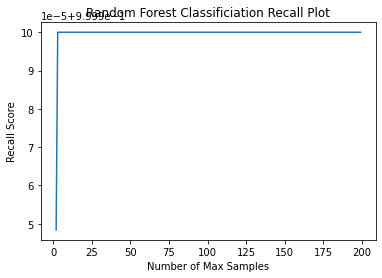

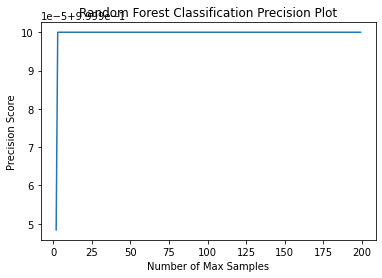

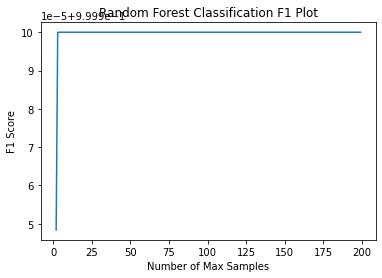

In [9]:
individual_plots()

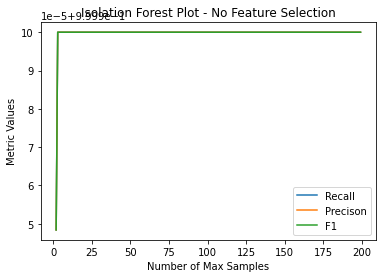

In [10]:
    plt.plot(ilist, recall_scores, label='Recall')
    plt.plot(ilist, precision_scores, label='Precison')
    plt.plot(ilist, f1_scores,label='F1')
    
    plt.xlabel('Number of Max Samples')
    plt.ylabel('Metric Values')
    plt.title('Isolation Forest Plot - No Feature Selection')
    
    leg = plt.legend();

    plt.show()